In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import sympy

$$\text{Analytically coding a generalized epicycloid and creating an animation for it   }$$

In [2]:
def createCardioid(R):
    
    # Only one radius is needed for both circles involved in a cardioid : 'R'
    # The rolling circle's center traces out a path on a circle with radius 2R
    # We wish to keep track of one point on this rolling circle
    # The two kinds of motion involved are:
    # 1. the rotation of the point due the rotation of the 2r circle (rolling of the outer circle)
    # 2. the rotation of the point on the circumference of the rolling circle itself!
    
    N = 1000;    f_2R = 1;    f_R = 2*f_2R
    theta_2R = np.linspace(np.pi, 3*np.pi, N);    theta_R  = np.linspace(    0, 2*np.pi, N)
    
    # accounting for 1.
    center2R = np.vstack((-2*R*np.cos(f_2R * theta_2R), -2*R*np.sin(f_2R * theta_2R))).T   # the center of the 2r circle at time step "t"
    
    # accounting for 2.
    dispR = np.vstack((-R*np.cos(f_R * theta_R), -R*np.sin(f_R * theta_R))).T
    
    # compounding the effect (translating by the circle of radius 2R)
    cardioid = center2R + dispR + np.array([R, 0])
    
    return cardioid


def plotCurve(points, titleStr, iR, oR):
    plt.figure(figsize=(6,6))
    plt.plot(points[:,0], points[:,1], 'b', linewidth=2)
    iCircleX = iR*np.cos(np.linspace(0,2*np.pi,100))
    iCircleY = iR*np.sin(np.linspace(0,2*np.pi,100))
    plt.plot(iCircleX, iCircleY, 'k--', linewidth=2)
    oCircleX = oR*np.cos(np.linspace(0,2*np.pi,100)) + iR + oR
    oCircleY = oR*np.sin(np.linspace(0,2*np.pi,100))
    plt.plot(oCircleX, oCircleY, 'k--', linewidth=2)
    plt.title(titleStr)
    plt.xlabel('x');     plt.ylabel('y')
    plt.grid(True)
    plt.show()


def createEpicycloid(iR, oR, rolling, c):
    
    N = 5000
    f_iR = 1
    if rolling=='True':     # ROLLING  -> outer circle rolling at calculated speed which is a function of radii
        print('Rolling!')
        c = iR + oR
        f_oR = c*f_iR
    elif rolling=='False':           # SLIPPING -> produce a shape with certain number of intersections/cusps
        print('Slipping!')
        f_oR = (c+1)*f_iR      # used to be c+1
    
    theta_iR = np.linspace(np.pi, 3*np.pi, N);    theta_oR = np.linspace(0, 2*np.pi, N)
    
    innerCirc = np.vstack((-(iR+oR)*np.cos(f_iR * theta_iR), -(iR+oR)*np.sin(f_iR * theta_iR))).T   # the center of the 2r circle at time step "t"
    
    outerCirc = np.vstack((-oR*np.cos(f_oR * theta_oR), -oR*np.sin(f_oR * theta_oR))).T
    
    epicycloid = innerCirc + outerCirc
    
    plotCurve(epicycloid, 'Epicycloid', iR, oR)
    
    return epicycloid

Enter epicycloid inner circle radius: 2
Enter epicycloid outer circle radius: 3
Enter True for rolling, False for slipping: True

Rolling...
Rolling!


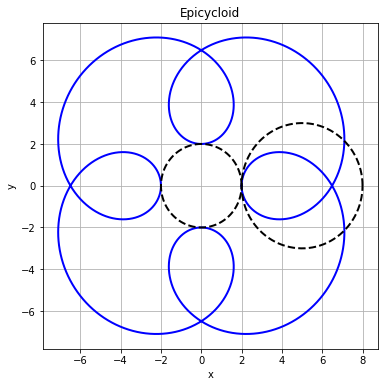

In [3]:
if __name__ == "__main__":
    
    # radius = float(input('Enter cardioid parametric radius: '))
    
    i_radius = float(input('Enter epicycloid inner circle radius: '))
    o_radius = float(input('Enter epicycloid outer circle radius: '))
    rolling  = input('Enter True for rolling, False for slipping: ')
    
    if rolling=="True":
        print('\nRolling...')
        cusps = 1
    elif rolling=="False":
        cusps = float(input('Enter number of cusps (by-product of slipping): '))
        print('\nSlipping...')
    
    epicycloid = createEpicycloid(i_radius, o_radius, rolling, cusps)